In [ ]:
	from __future__ import print_function, division
from builtins import range, input
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os

In [ ]:
path = '/content/drive/MyDrive/EyePACS/Messidor-2+EyePac_Balanced'
data_dir_list = os.listdir(path)
data_dir_list

['0', '4', '1', '3', '2']

In [ ]:
img_rows=224
img_cols=224
num_channel=3
img_data_list=[]
classes_names_list=[]
target_column=[]

In [ ]:
import cv2
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting image from {} folder".format(dataset))
    img_list= os.listdir(path +"/"+ dataset)
    for img in img_list:
        input_img = cv2.imread(path +"/"+dataset+"/"+img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting image from 0 folder
Getting image from 4 folder
Getting image from 1 folder
Getting image from 3 folder
Getting image from 2 folder


In [ ]:
num_classes = len(classes_names_list)
print("num_classes",num_classes)
img_data = np.array(img_data_list) # convert images in numpy array 
img_data = img_data.astype('float32')
img_data /= 255
print("Shape of image data",img_data.shape)
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape 
print("number of samples",num_of_samples)
print("target column before encoding",target_column)

num_classes 5
Shape of image data (1800, 224, 224, 3)
number of samples 1800
target column before encoding ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [ ]:
from sklearn.preprocessing import LabelEncoder
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([0, 1, 2, 3, 4])

In [ ]:
target_column

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_temp,y_train,y_temp = train_test_split(X,Y,test_size=0.3,random_state=2)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=2)

In [ ]:
vgg = VGG19(input_shape=[224,224,3], weights='imagenet', include_top=False)
# For not training the VGG weights
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(5, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(validation_split=0.2, preprocessing_function = preprocess_input)
train_generator = datagen.flow_from_directory(
path,
subset='training',
target_size=[224,224],
classes = ['0','1','2','3','4'],
class_mode = 'categorical')
valid_generator = datagen.flow_from_directory(
path, 
subset='validation',
target_size=[224,224],
classes = ['0','1','2','3','4'],
class_mode = 'categorical')

Found 1440 images belonging to 5 classes.
Found 360 images belonging to 5 classes.


In [ ]:
history = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs= 50,
  steps_per_epoch= 1,
  verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1/1 [==============================] - 263s 263s/step - loss: 17.1114 - accuracy: 0.1562 - val_loss: 39.2001 - val_accuracy: 0.2861
Epoch 2/50
1/1 [==============================] - 247s 247s/step - loss: 35.4050 - accuracy: 0.2812 - val_loss: 69.3994 - val_accuracy: 0.2000
Epoch 3/50
1/1 [==============================] - 246s 246s/step - loss: 75.2812 - accuracy: 0.2188 - val_loss: 39.1335 - val_accuracy: 0.2639
Epoch 4/50
1/1 [==============================] - 245s 245s/step - loss: 34.1382 - accuracy: 0.2812 - val_loss: 33.2940 - val_accuracy: 0.2528
Epoch 5/50
1/1 [==============================] - 245s 245s/step - loss: 38.7138 - accuracy: 0.2188 - val_loss: 27.1973 - val_accuracy: 0.2556
Epoch 6/50
1/1 [==============================] - 245s 245s/step - loss: 23.6339 - accuracy: 0.1875 - val_loss: 31.0146 - val_accuracy: 0.3278
Epoch 7/50
1/1 [==============================] - 245s 245s/step - loss: 33.5092 - accuracy: 0.2812 - val_loss: 33.2314 - val_accuracy: 0.3528

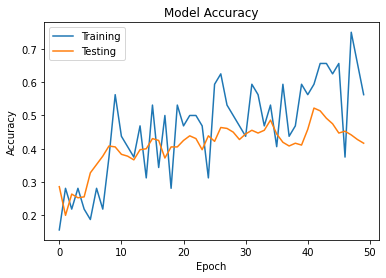

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'])
plt.show()

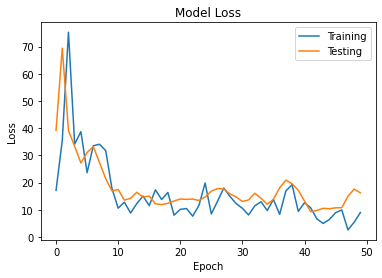

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'])
plt.show()

In [ ]:
batch_size = 32
y_pred = model.predict(X_test, batch_size=batch_size)

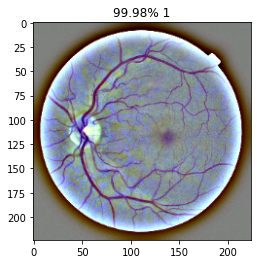

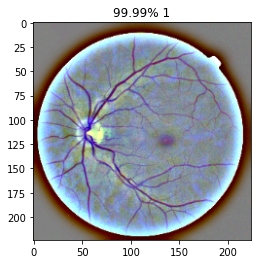

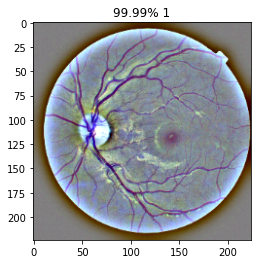

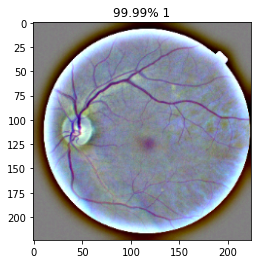

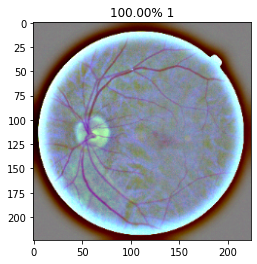

In [ ]:
prediction=y_pred[0:5]
for index, probability in enumerate(prediction):
  if probability[1] > 0.9:
        plt.title('%.2f' % (probability[1]*100) + '% 0')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% 1')
  plt.imshow(X_test[index])
  plt.show()

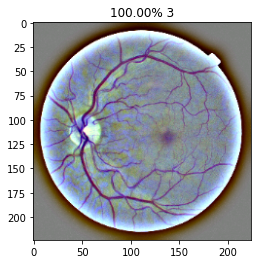

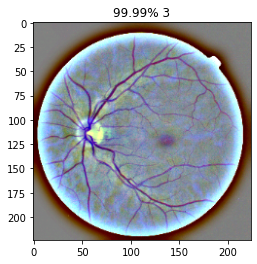

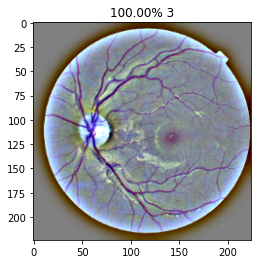

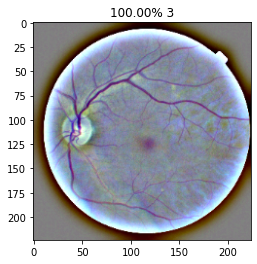

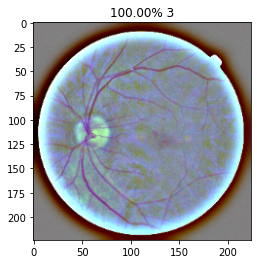

In [ ]:
prediction=y_pred[11:16]
for index, probability in enumerate(prediction):
  if probability[1] > 0.7:
        plt.title('%.2f' % (probability[1]*100) + '% 2')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% 3')
  plt.imshow(X_test[index])
  plt.show()

In [ ]:
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(normalize):
  classes = ['0','1','2','3','4']
  tick_marks = [0.5,1.5,2.5,3.5,4.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion Matrix without Normalization


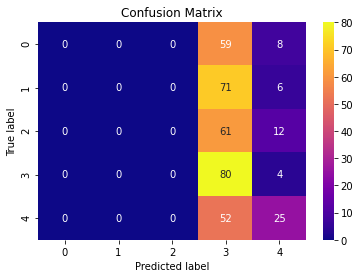

In [ ]:
import seaborn as sns
print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00        73
           3       0.25      0.95      0.39        84
           4       0.45      0.32      0.38        77

    accuracy                           0.28       378
   macro avg       0.14      0.26      0.15       378
weighted avg       0.15      0.28      0.16       378



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
